In [31]:
import shapely
import math
import os
import random
from decimal import Decimal, getcontext

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
from shapely import affinity, touches
from shapely.geometry import Polygon
from shapely.ops import unary_union
from shapely.strtree import STRtree

pd.set_option('display.float_format', '{:.12f}'.format)

# Set precision for Decimal
getcontext().prec = 25
scale_factor = Decimal('1e15')

In [32]:
from decimal import Decimal
from shapely.geometry import Polygon
from shapely import affinity

class ChristmasTree:
    def __init__(self, center_x='0', center_y='0', angle='0'):
        # Ensure center coordinates and angle are Decimals
        self.center_x = Decimal(str(center_x))
        self.center_y = Decimal(str(center_y))
        self.angle = Decimal(str(angle))

        # Defining the tree parts as Decimals
        trunk_w, trunk_h = Decimal('0.15'), Decimal('0.2')
        base_w, mid_w, top_w = Decimal('0.7'), Decimal('0.4'), Decimal('0.25')
        tip_y, tier_1_y, tier_2_y, base_y = Decimal('0.8'), Decimal('0.5'), Decimal('0.25'), Decimal('0.0')
        trunk_bottom_y = -trunk_h

        # Use Decimal for all coordinates in the list
        pts = [
            (Decimal('0.0'), tip_y), 
            (top_w/2, tier_1_y), (top_w/4, tier_1_y),
            (mid_w/2, tier_2_y), (mid_w/4, tier_2_y), 
            (base_w/2, base_y),
            (trunk_w/2, base_y), (trunk_w/2, trunk_bottom_y),
            (-trunk_w/2, trunk_bottom_y), (-trunk_w/2, base_y),
            (-base_w/2, base_y), 
            (-mid_w/4, tier_2_y), (-mid_w/2, tier_2_y),
            (-top_w/4, tier_1_y), (-top_w/2, tier_1_y)
        ]

        # Now multiplication works because both are Decimals
        # We convert to float at the very end because Shapely requires floats for the Polygon
        scaled_pts = [(float(p[0] * scale_factor), float(p[1] * scale_factor)) for p in pts]
        initial_polygon = Polygon(scaled_pts)
        
        # Rotate and Translate
        rotated = affinity.rotate(initial_polygon, float(self.angle), origin=(0, 0))
        self.polygon = affinity.translate(
            rotated, 
            xoff=float(self.center_x * scale_factor), 
            yoff=float(self.center_y * scale_factor)
        )


In [ ]:
def plot_results(side_length, placed_trees, num_trees):
    """Plots the arrangement of trees and the bounding square."""
    _, ax = plt.subplots(figsize=(6, 6))
    colors = plt.cm.viridis([i / num_trees for i in range(num_trees)])

    all_polygons = [t.polygon for t in placed_trees]
    bounds = unary_union(all_polygons).bounds

    for i, tree in enumerate(placed_trees):
        # Rescale for plotting
        x_scaled, y_scaled = tree.polygon.exterior.xy
        x = [Decimal(val) / scale_factor for val in x_scaled]
        y = [Decimal(val) / scale_factor for val in y_scaled]
        ax.plot(x, y, color=colors[i])
        ax.fill(x, y, alpha=0.5, color=colors[i])

    minx = Decimal(bounds[0]) / scale_factor
    miny = Decimal(bounds[1]) / scale_factor
    maxx = Decimal(bounds[2]) / scale_factor
    maxy = Decimal(bounds[3]) / scale_factor

    width = maxx - minx
    height = maxy - miny

    square_x = minx if width >= height else minx - (side_length - width) / 2
    square_y = miny if height >= width else miny - (side_length - height) / 2
    bounding_square = Rectangle(
        (float(square_x), float(square_y)),
        float(side_length),
        float(side_length),
        fill=False,
        edgecolor='red',
        linewidth=2,
        linestyle='--',
    )
    ax.add_patch(bounding_square)

    padding = 0.5
    ax.set_xlim(
        float(square_x - Decimal(str(padding))),
        float(square_x + side_length + Decimal(str(padding))))
    ax.set_ylim(float(square_y - Decimal(str(padding))),
                float(square_y + side_length + Decimal(str(padding))))
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    plt.title(f'{num_trees} Trees: {side_length:.12f}')
    plt.show()
    plt.close()

In [53]:
import spyrrow
import numpy as np
import math
from decimal import Decimal

trunk_w, trunk_h = Decimal('0.15'), Decimal('0.2')
base_w, mid_w, top_w = Decimal('0.7'), Decimal('0.4'), Decimal('0.25')
tip_y, tier_1_y, tier_2_y, base_y = Decimal('0.8'), Decimal('0.5'), Decimal('0.25'), Decimal('0.0')
trunk_bottom_y = -trunk_h
# scale_factor = Decimal('1e15')
scale_factor = Decimal('1')

# Use Decimal for all coordinates in the list
pts = [
    (Decimal('0.0'), tip_y), 
    (top_w/2, tier_1_y), (top_w/4, tier_1_y),
    (mid_w/2, tier_2_y), (mid_w/4, tier_2_y), 
    (base_w/2, base_y),
    (trunk_w/2, base_y), (trunk_w/2, trunk_bottom_y),
    (-trunk_w/2, trunk_bottom_y), (-trunk_w/2, base_y),
    (-base_w/2, base_y), 
    (-mid_w/4, tier_2_y), (-mid_w/2, tier_2_y),
    (-top_w/4, tier_1_y), (-top_w/2, tier_1_y)
]

scaled_pts = [(float(p[0] * scale_factor), float(p[1] * scale_factor)) for p in pts]

trees = spyrrow.Item(
    "tree", scaled_pts, demand=16, allowed_orientations=list(np.arange(-180,188,8).astype(int))
)

instance = spyrrow.StripPackingInstance(
    "test", strip_height=2.4, items=[trees]
)
config = spyrrow.StripPackingConfig(early_termination=False,total_computation_time=600,num_workers=5)
sol = instance.solve(config)

In [54]:
for pi in sol.placed_items:
    print(pi.id)
    print(pi.rotation)
    print(*pi.translation)
    print("\n")

tree
108.0
1.7670786380767822 1.8344206809997559


tree
116.0
1.8788117170333862 0.4107159972190857


tree
-28.0000057220459
2.1998095512390137 1.4545644521713257


tree
-20.0
2.2462966442108154 0.21372626721858978


tree
148.0
1.2794358730316162 2.1905550956726074


tree
20.0
0.32895925641059875 1.587545394897461


tree
-20.0
0.5819383859634399 1.2052021026611328


tree
-116.0
0.31193387508392334 0.350709468126297


tree
-68.0
1.0707335472106934 1.2329505681991577


tree
-164.0
0.7532656788825989 0.9055123329162598


tree
68.0
2.1572256088256836 2.0753989219665527


tree
-28.0000057220459
1.5804599523544312 0.8613559007644653


tree
156.0
0.3254026770591736 1.080679178237915


tree
148.0
2.278573513031006 1.1638256311416626


tree
68.0
0.7627683877944946 2.075422763824463


tree
156.0
1.3475098609924316 0.740910530090332




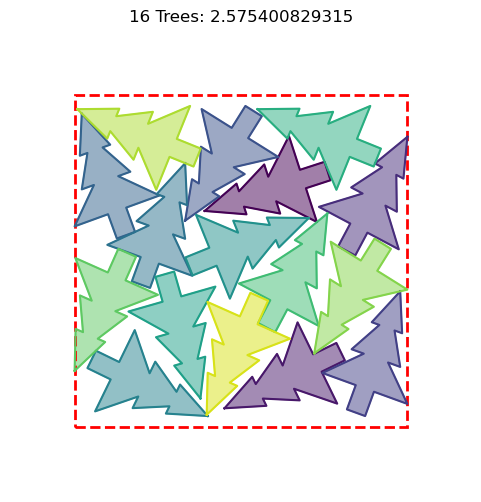

In [56]:
trees = []
for pi in sol.placed_items:
    tree = ChristmasTree(center_x=str(pi.translation[0]), center_y=str(pi.translation[1]), angle=str(pi.rotation))
    trees.append(tree)

plot_results(Decimal(f'{sol.width}'), trees, 16)
